In [51]:
import pandas as pd
import requests
import time
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

URL = "https://thinkil.co.il/texts-sitemap.xml"
TSV_FILENAME = "ex2_articles.tsv"
HEBREW_STOPWORDS = "heb_stopwords.txt"

In [57]:
# Get urls from sitemap
def get_page_list_from_sitemap(url):
    # Get html from url
    print("Loading sitemap...")
    page_html = requests.get(URL)
    print("Done.")
    # Create soup object
    page_soup = BeautifulSoup(page_html.text)
    # Remove html from text, convert all text to lower case
    page_text = page_soup.get_text().lower()
    # Keep each url in separate line
    page_list = page_text.splitlines()

    return page_list

# Senetize list
def senetize_list(page_list):
    # Remove empty lines
    url_list = [line for line in page_list if len(line) > 0]
    # Remove non url lines
    url_list = [line for line in url_list if line.startswith("https://thinkil.co.il/")]
    # Remove urls of images
    url_list = [line for line in url_list if (not line.endswith(".jpg") and (not line.endswith(".png")))]
    # Remove table of contents url
    url_list = url_list[1:]

    return url_list

# Senetize text
def senetize_text(text):
    # Remove whitespaces from the beginning and the end of the text
    text = text.strip()
    # Keep only hebrew characters and spaces
    text = re.sub('[^\u0590-\u05fe ]', '', text)
    # Remove all excess whitespaces from the text
    text = re.sub('\s+', ' ', text)

    return text

# Get articles content
def get_articles_content(url_list):
    articles_list = []
    for i, article_url in enumerate(url_list):
        # Print progress
        print(f"Loading article {str(i + 1)} out of {str(len(url_list) + 1)}...")

        # Get html from url
        article_html = requests.get(article_url)
        # Create soup object
        article_soup = BeautifulSoup(article_html.text)

        # Get article's title
        article_title = article_soup.find("h1", {"class": "page-title"}).get_text()
        # Senetize text
        article_title = senetize_text(article_title)

        # Get article's authors
        article_authors = article_soup.find_all("span", {"class": "author-name"})
        # Senetize and convert to set to remove duplicates
        article_authors_set = set(senetize_text(author_name.get_text()) for author_name in article_authors)
        # Convert set to comma separated string
        article_authors = ", ".join(article_authors_set)

        # Get article's content
        article_text = article_soup.find("div", {"id": "content"}).get_text()
        # Senetize text
        article_text = senetize_text(article_text)

        # Add new row to dataframe
        articles_list.append([article_url, article_authors, article_title, article_text])

        # Wait for 1 second
        time.sleep(1)

    print("Done.")
    return articles_list

# Create TSV file
def create_tsv_file(articles_list):
    # Create dataframe
    articles = pd.DataFrame(articles_list, columns=["url", "author", "title", "text"])
    # Save dataframe to TSV file
    articles.to_csv(TSV_FILENAME, sep="\t",  encoding="utf-8")
    print(F"Articles contant saved to '{TSV_FILENAME}'.")


page_list = get_page_list_from_sitemap(URL)
url_list = senetize_list(page_list)
articles_list = get_articles_content(url_list)
create_tsv_file(articles_list)

Loading sitemap...
Done.
Loading article 1 out of 283...
Loading article 2 out of 283...
Loading article 3 out of 283...
Loading article 4 out of 283...
Loading article 5 out of 283...
Loading article 6 out of 283...
Loading article 7 out of 283...
Loading article 8 out of 283...
Loading article 9 out of 283...
Loading article 10 out of 283...
Loading article 11 out of 283...
Loading article 12 out of 283...
Loading article 13 out of 283...
Loading article 14 out of 283...
Loading article 15 out of 283...
Loading article 16 out of 283...
Loading article 17 out of 283...
Loading article 18 out of 283...
Loading article 19 out of 283...
Loading article 20 out of 283...
Loading article 21 out of 283...
Loading article 22 out of 283...
Loading article 23 out of 283...
Loading article 24 out of 283...
Loading article 25 out of 283...
Loading article 26 out of 283...
Loading article 27 out of 283...
Loading article 28 out of 283...
Loading article 29 out of 283...
Loading article 30 out of 2

In [60]:
# Get articles list for analysis
def get_articles_list_from_tsv(path):
    return pd.read_csv(path, sep='\t')

articles_list = get_articles_list_from_tsv(TSV_FILENAME)
articles = articles_list["text"]

# Get hebrew stopwords
def get_hebrew_stopwords(path):
    with open(path, encoding="utf-8") as in_file:
        return set(in_file.read().splitlines())

hebrew_stopwords = get_hebrew_stopwords(HEBREW_STOPWORDS)

In [77]:
# Q1 - Convert a text to list of words spearated by space
def get_list_of_words(text):
    return text.split()

# Convert a text to list of bigrams (two words) spearated by space
def get_list_of_bigrams(text):
    words = get_list_of_words(text)
    return [f"{words[i]} {words[i+1]}" for i in range(len(words)-1)]

# Remove stopwords from a list of words
def remove_stopwords(words_list, stopwords):
    return [word for word in words_list if word not in stopwords]

# Remove from list of bigrams all bigrams with stopword in them
def remove_stopwords_from_bigrams(bigrams_list, stopwords):
    return [bigram for bigram in bigrams_list if len(set(bigram.split()) & set(stopwords)) == 0]

# Plot histogram of words frequency
def plot_histogram(words_dataframe, color='blue'):
    # Get words
    keys = [x[0] for x in words_dataframe.keys()]
    # Reverse text of each key
    keys = [key[::-1] for key in keys]
    
    # Plot histogram
    plt.barh(keys, words_dataframe.values, color=color)
    plt.show()
    plt.close()


3320 3065 5531 3431 3730 5017 5151 5280 4098 9342 6509 7470 4293 4382 3348 4570 4285 4087 3918 2327 2622 3503 2611 2189 2898 3192 4403 3483 2748 3630 16815 3880 5299 4341 2437 4079 6643 3105 4456 6394 1825 8858 3846 4029 3151 5742 4056 3353 4210 4043 6554 6899 6560 4371 4785 6711 5078 5627 3013 6792 3210 3398 25910 4224 1923 1662 2759 5258 3892 2970 4486 4292 6177 2511 6048 3672 5315 3292 5002 2678 4299 2965 6874 3514 2800 4797 3060 4069 5035 663 4312 9010 3407 3910 3131 2592 2941 6818 6569 3974 2246 2349 2804 3421 3559 3809 7053 4537 4944 2747 1825 2718 1603 1305 3114 3023 4560 4152 2089 832 1038 2303 3359 2419 739 4209 2630 3519 1144 2345 2766 3131 2859 3725 3359 3134 3470 3655 3393 2994 3664 2515 3906 3522 4176 3256 2669 1272 4097 6294 5256 2548 3562 3369 1713 3579 2398 1924 1732 981 200 3708 2142 2245 2566 3137 340 1512 1956 1983 2167 1927 1478 1553 2702 494 3422 1913 268 1556 1633 836 1176 1137 3581 1157 1159 1600 657 2340 767 1191 805 3153 535 1557 1084 599 1819 2639 2389 6788 60

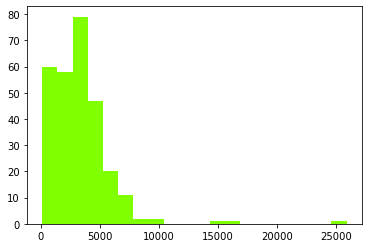

In [49]:
# Q2
def print_words_histogram(articles_list):
    num_of_words = []
    
    # For each article
    for article in articles_list:
        # Convert article's text to list of words
        article_words = get_list_of_words(article)
        # Add number of words to the list
        num_of_words.append(len(article_words))
        # Print result
        print(len(article_words), end=" ")

    # Plot histogram
    plt.hist(num_of_words, bins=20, color='Chartreuse')
    plt.show()
    plt.close()


print_words_histogram(articles)

של      30606
את      18031
על      11319
הוא      7493
לא       7316
זה       5778
היא      4757
כל       4607
או       4606
אם       3871
גם       3788
כי       3431
בין      3220
יותר     3168
עם       2972
זאת      2820
זו       2805
אין      2605
מה       2554
אלא      2471
dtype: int64


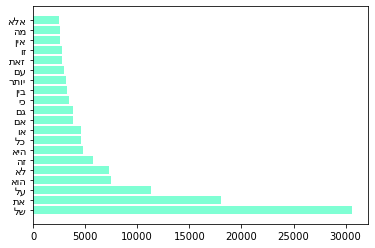

In [78]:
# Q3
def print_histogram_of_most_common_words(articles_list, n):
    all_words = []

    # For each article
    for article in articles_list:
        # Add words to the list
        all_words += get_list_of_words(article)

    # Sort words by frequency and get top n
    sorted_values = pd.DataFrame(all_words).value_counts()
    frequent_words = sorted_values.iloc[:n]

    # Print result
    print(frequent_words)

    # Plot histogram
    plot_histogram(frequent_words, 'Aquamarine')

print_histogram_of_most_common_words(articles, 20)

על ידי       886
על פי        592
את כל        472
של האדם      425
לא רק        407
של כל        336
כדור הארץ    325
כי אם        291
של המדע      288
על כך        288
לא היה       281
של דבר       258
לעומת זאת    255
זה של        249
על כל        230
המאה ה       220
על פני       216
הרבה יותר    215
להבין את     213
כל כך        210
dtype: int64


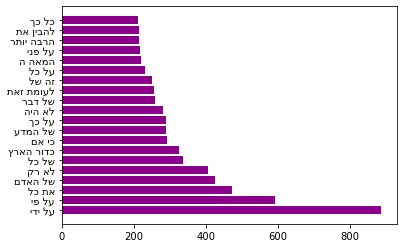

In [70]:
# Q4
def print_histogram_of_most_common_bigrams(articles_list, n):
    all_bigrams = []

    # For each article
    for article in articles_list:
        # Add bigrams to the list
        all_bigrams += get_list_of_bigrams(article)

    # Sort bigrams by frequency and get top n
    sorted_values = pd.DataFrame(all_bigrams).value_counts()
    frequent_bigrams = sorted_values.iloc[:20]

    # Print result
    print(frequent_bigrams)

    # Plot histogram
    plot_histogram(frequent_bigrams, 'DarkMagenta')

print_histogram_of_most_common_bigrams(articles, 20)

האדם       1692
אינו       1370
אשר        1294
ידי         948
אינה        906
כלומר       891
פי          841
המדע        828
ע״י         816
בכך         760
כפי         736
שכן         721
המציאות     719
מערכת       705
לבין        703
שונים       685
כיוון       684
אצל         662
כיצד        642
אינם        642
dtype: int64


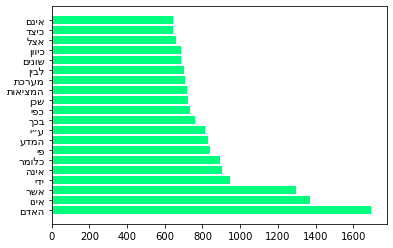

In [79]:
# Q5
def print_histogram_of_most_common_non_stopword_words(articles_list, n, stopwords):
    all_words = []

    # For each article
    for article in articles_list:
        # Add non stopword words to the list
        all_words += remove_stopwords(get_list_of_words(article), stopwords)

    # Sort words by frequency and get top n
    sorted_values = pd.DataFrame(all_words).value_counts()
    frequent_words = sorted_values.iloc[:n]

    # Print result
    print(frequent_words)

    # Plot histogram
    plot_histogram(frequent_words, 'SpringGreen')

print_histogram_of_most_common_non_stopword_words(articles, 20, hebrew_stopwords)

כדור הארץ         325
במילים אחרות      132
הבירור הטבעי      131
תורת היחסות       124
המפץ הגדול        105
השנים האחרונות     97
טבע האדם           85
במלים אחרות        83
כיוון שכך          83
באותה מידה         83
בעת ובעונה         76
פני כדור           74
הברירה הטבעית      73
חוקי הטבע          62
בשנים האחרונות     58
וכן הלאה           58
יתרה מזו           57
תורת הקוואנטים     57
חברת יבמ           57
המין האנושי        56
dtype: int64


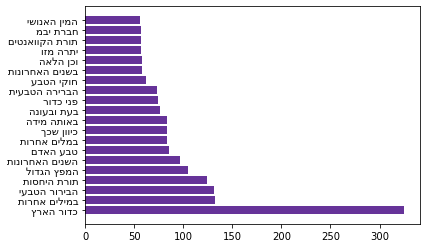

In [80]:
# Q6
def print_histogram_of_most_common_non_stopword_bigrams(articles_list, n, stopwords):
    all_bigrams = []

    # For each article
    for article in articles_list:
        # Add non stopword bigrams to the list
        all_bigrams += remove_stopwords_from_bigrams(get_list_of_bigrams(article), stopwords)

    # Sort bigrams by frequency and get top n
    sorted_values = pd.DataFrame(all_bigrams).value_counts()
    frequent_bigrams = sorted_values.iloc[:n]

    # Print result
    print(frequent_bigrams)

    # Plot histogram
    plot_histogram(frequent_bigrams, 'RebeccaPurple')

print_histogram_of_most_common_non_stopword_bigrams(articles, 20, hebrew_stopwords)

## שאלה 3 - ניתוח

### סעיף א
אנו רואים בעיקר מילים וזוגות מילים שקשורים למדע מודרני. דוגמאות : 
כדור הארץ, תורת היחסות, חברת י.ב.מ
אנו רואים שצבי ינאי מופיע הרבה ולקח חלק גדול בכתיבת המאמרים.

### סעיף ב
בעברית יש הרבה שימוש ב

stop words,

שקשה להבין בעזרתן על מה הטקסט מדבר,
יכולנו להסיק את תוכן הטקסטים רק לאחר שניקינו מילים אלו מהסטטיסטיקה.
כשמדובר בזוגות מילים, עדיין הזוגות השכיחים ביותר מכילים 

stop words,

עם זאת זה פחות שכיח מאשר במילים בודדות.
עדיין ניתן למצוא מילים בעלות משמעות כמו "כדור הארץ" ב20 זוגות המילים הנפוצות ביותר.

### סעיף ג
מופיעים הרבה סימני פיסוק (מקף, פסיק), טאבים, ירידת שורה שצריך לנקות מהטקסט למרות שאינם קשורים לעברית או אנגלית.
בנוסף, על מנת לקבל רק את הקישורים למאמרים, יש צורך לנקות את קישורי התמונות.
